In [2]:
# imports
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import warnings
import statistics as st             # for statistical analysis
warnings.filterwarnings("ignore")

In [3]:
# setting up several paths 
sys.path.append(".")
sys.path.append("..")
sys.path.insert(1, '../scripts')
from dataCleaner import *

In [4]:
# read data
df = pd.read_csv('../data/Week1_challenge_data_source_filled.csv.bz2')
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),total_google,total_email,total_gaming,total_youtube,total_netflix,total_social
0,1.311450e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,171744450.0,8814393.0,36749741.0,308879636.0,2905912.0,2905912.0,2905912.0,2905912.0,2905912.0,2905912.0
1,1.311450e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,526904238.0,15055145.0,53800391.0,653384965.0,4414096.0,4414096.0,4414096.0,4414096.0,4414096.0,4414096.0
2,1.311450e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,410692588.0,4215763.0,27883638.0,279807335.0,10229119.0,10229119.0,10229119.0,10229119.0,10229119.0,10229119.0
3,1.311450e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,749039933.0,12797283.0,43324218.0,846028530.0,11811761.0,11811761.0,11811761.0,11811761.0,11811761.0,11811761.0
4,1.311450e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,550709500.0,13910322.0,38542814.0,569138589.0,7748843.0,7748843.0,7748843.0,7748843.0,7748843.0,7748843.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.304240e+19,2019-04-29 07:28:00,615.0,2019-04-30 00:01:00,407.0,59587.0,2.082010e+14,3.366865e+10,3.533250e+13,T85721A,...,321383162.0,14890486.0,53745392.0,819016468.0,1265634.0,1265634.0,1265634.0,1265634.0,1265634.0,1265634.0
149996,7.277830e+18,2019-04-29 07:28:00,451.0,2019-04-30 06:02:00,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,3264510.0,13487416.0,57628851.0,574175259.0,12784914.0,12784914.0,12784914.0,12784914.0,12784914.0,12784914.0
149997,7.349880e+18,2019-04-29 07:28:00,483.0,2019-04-30 10:41:00,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,712180387.0,2457758.0,39135081.0,666648844.0,4415361.0,4415361.0,4415361.0,4415361.0,4415361.0,4415361.0
149998,1.311450e+19,2019-04-29 07:28:00,283.0,2019-04-30 10:46:00,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,121100856.0,11314729.0,34912224.0,592786405.0,6585469.0,6585469.0,6585469.0,6585469.0,6585469.0,6585469.0


In [5]:
# create a df cleaner instance
cleaner = dataCleaner(df)

Data cleaner in action.


# EDA

## User overview analysis part two

### Basic Metrics

In [6]:
# selected relevant features
relevant_features = ['Dur. (ms)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)', 'total_google', 'total_email', 'total_gaming', 'total_youtube', 'total_netflix', 'total_social']

* Analyze the basic metrics (mean, median, etc) in the Dataset

In [7]:
# basic metrics
print("Mean\n", df[relevant_features].mean(), '\n')
print("Median\n", df[relevant_features].median(), '\n')

mode_series = pd.Series(df[relevant_features].mode().values[0], index=relevant_features)
print("Mode\n", mode_series, '\n')

print("Highest\n", df[relevant_features].max(), '\n')
print("lowest\n", df[relevant_features].min(), '\n')

Mean
 Dur. (ms)                    1.046086e+05
Activity Duration DL (ms)    1.829177e+06
Activity Duration UL (ms)    1.408880e+06
Social Media DL (Bytes)      1.795322e+06
Social Media UL (Bytes)      3.292843e+04
Google DL (Bytes)            5.750753e+06
Google UL (Bytes)            2.056542e+06
Email DL (Bytes)             1.791729e+06
Email UL (Bytes)             4.673734e+05
Youtube DL (Bytes)           1.163407e+07
Youtube UL (Bytes)           1.100941e+07
Netflix DL (Bytes)           1.162685e+07
Netflix UL (Bytes)           1.100175e+07
Gaming DL (Bytes)            4.220447e+08
Gaming UL (Bytes)            8.288398e+06
Other DL (Bytes)             4.211005e+08
Other UL (Bytes)             8.264799e+06
Total UL (Bytes)             4.112121e+07
Total DL (Bytes)             4.546434e+08
total_google                 7.807295e+06
total_email                  7.807295e+06
total_gaming                 7.807295e+06
total_youtube                7.807295e+06
total_netflix               

### Non-Graphical Univariate Analysis

Computing dispersion parameters for each quantitative variable

In [8]:
for cols in relevant_features:
    print(cols)
    # mean - the average
    print("Mean", st.mean(df[cols]))
    
    # mode - most common value
    print("Mode", st.mode(df[cols]))
    
    # median - the center value
    print("Median", st.median(df[cols]))
    
    # variance
    print("Variance", st.variance(df[cols]))

    # standard deviation
    print("St. Dev", st.stdev(df[cols]))
    
    # skew
    # A value less than -1 is skewed to the left; that greater than 1 is skewed to the right. A value between -1 and 1 is symmetric.
    print("Skew", df[cols].skew())
    print()

Dur. (ms)
Mean 104608.56034666667
Mode 86399.0
Median 86399.0
Variance 6567096094.973978
St. Dev 81037.62147900183
Skew 3.9526086118445365

Activity Duration DL (ms)
Mean 1829176.8718333333
Mode 0.0
Median 39304.5
Variance 32448921299593.746
St. Dev 5696395.46551973
Skew 5.872255845624154

Activity Duration UL (ms)
Mean 1408879.96752
Mode 0.0
Median 46793.5
Variance 21559590395533.21
St. Dev 4643230.599004664
Skew 7.3825567205800935

Social Media DL (Bytes)
Mean 1795321.7736466667
Mode 2865700.0
Median 1794351.0
Variance 1072230692017.4231
St. Dev 1035485.727577847
Skew -0.002136232193059052

Social Media UL (Bytes)
Mean 32928.43438
Mode 30810.0
Median 32920.0
Variance 361237220.1550817
St. Dev 19006.241610457382
Skew -0.00035925172184189365

Google DL (Bytes)
Mean 5750752.619286667
Mode 6296014.0
Median 5765857.0
Variance 10950196071665.457
St. Dev 3309108.047747226
Skew -0.008092320952508496

Google UL (Bytes)
Mean 2056541.9262866667
Mode 3426526.0
Median 2054569.0
Variance 141591173

another way of making non graphical descriptions on quantitative variables

In [9]:
df[relevant_features].describe()

,Dur. (ms),Activity Duration DL (ms),Activity Duration UL (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),...,Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),total_google,total_email,total_gaming,total_youtube,total_netflix,total_social
count,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,150000.00000,1.500000e+05,1.500000e+05,1.500000e+05,150000.000000,1.500000e+05,...,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05
mean,1.046086e+05,1.829177e+06,1.408880e+06,1.795322e+06,32928.43438,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,...,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08,7.807295e+06,7.807295e+06,7.807295e+06,7.807295e+06,7.807295e+06,7.807295e+06
std,8.103762e+04,5.696395e+06,4.643231e+06,1.035486e+06,19006.24161,3.309108e+06,1.189921e+06,1.035843e+06,269970.206933,6.710591e+06,...,2.432058e+08,4.769020e+06,1.127639e+07,2.441429e+08,3.516432e+06,3.516432e+06,3.516432e+06,3.516432e+06,3.516432e+06,3.516432e+06
min,7.142000e+03,0.000000e+00,0.000000e+00,1.200000e+01,0.00000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,...,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06,4.033000e+04,4.033000e+04,4.033000e+04,4.033000e+04,4.033000e+04,4.033000e+04
25%,5.744050e+04,1.487775e+04,2.153975e+04,8.991448e+05,16448.00000,2.882380e+06,1.024274e+06,8.927808e+05,233379.750000,5.833482e+06,...,2.101824e+08,4.145904e+06,3.322201e+07,2.431068e+08,4.943592e+06,4.943592e+06,4.943592e+06,4.943592e+06,4.943592e+06,4.943592e+06
50%,8.639900e+04,3.930450e+04,4.679350e+04,1.794351e+06,32920.00000,5.765857e+06,2.054569e+06,1.793534e+06,466246.000000,1.161601e+07,...,4.218057e+08,8.267086e+06,4.114331e+07,4.558411e+08,7.812852e+06,7.812852e+06,7.812852e+06,7.812852e+06,7.812852e+06,7.812852e+06
75%,1.324302e+05,6.796095e+05,5.990952e+05,2.694939e+06,49334.00000,8.623579e+06,3.088454e+06,2.689329e+06,700441.500000,1.744855e+07,...,6.316950e+08,1.238420e+07,4.903424e+07,6.657055e+08,1.068285e+07,1.068285e+07,1.068285e+07,1.068285e+07,1.068285e+07,1.068285e+07
max,1.859336e+06,1.365365e+08,1.449113e+08,3.586064e+06,65870.00000,1.146283e+07,4.121357e+06,3.586146e+06,936418.000000,2.325910e+07,...,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08,1.552878e+07,1.552878e+07,1.552878e+07,1.552878e+07,1.552878e+07,1.552878e+07


In [8]:
sub_relevant_features = ['MSISDN/Number','Dur. (ms)','Total UL (Bytes)', 'Total DL (Bytes)', 'total_google','total_email','total_gaming','total_youtube','total_netflix','total_social']
df[sub_relevant_features].describe()

,MSISDN/Number,Dur. (ms),Total UL (Bytes),Total DL (Bytes),total_google,total_email,total_gaming,total_youtube,total_netflix,total_social
count,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05
mean,4.182446e+10,1.046086e+05,4.112121e+07,4.546434e+08,7.807295e+06,7.807295e+06,7.807295e+06,7.807295e+06,7.807295e+06,7.807295e+06
std,2.438739e+12,8.103762e+04,1.127639e+07,2.441429e+08,3.516432e+06,3.516432e+06,3.516432e+06,3.516432e+06,3.516432e+06,3.516432e+06
min,3.360100e+10,7.142000e+03,2.866892e+06,7.114041e+06,4.033000e+04,4.033000e+04,4.033000e+04,4.033000e+04,4.033000e+04,4.033000e+04
25%,3.365151e+10,5.744050e+04,3.322201e+07,2.431068e+08,4.943592e+06,4.943592e+06,4.943592e+06,4.943592e+06,4.943592e+06,4.943592e+06
50%,3.366371e+10,8.639900e+04,4.114331e+07,4.558411e+08,7.812852e+06,7.812852e+06,7.812852e+06,7.812852e+06,7.812852e+06,7.812852e+06
75%,3.368307e+10,1.324302e+05,4.903424e+07,6.657055e+08,1.068285e+07,1.068285e+07,1.068285e+07,1.068285e+07,1.068285e+07,1.068285e+07
max,8.823970e+14,1.859336e+06,7.833131e+07,9.029696e+08,1.552878e+07,1.552878e+07,1.552878e+07,1.552878e+07,1.552878e+07,1.552878e+07


* Insights

I) Users download more than they upload

II) Users upload data is more distributed than the download data

III) Users spend more on games than on social medial and other platforms

### Graphical Univariate Analysis

#### Outliers

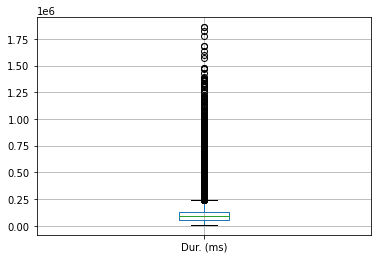

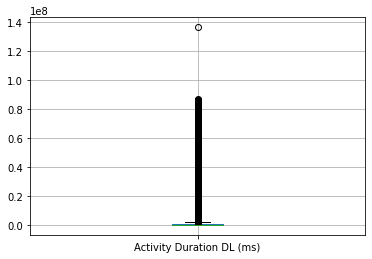

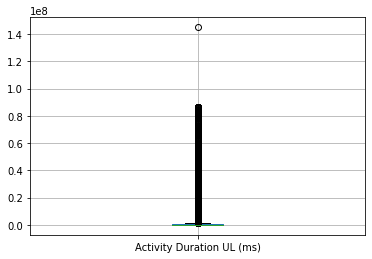

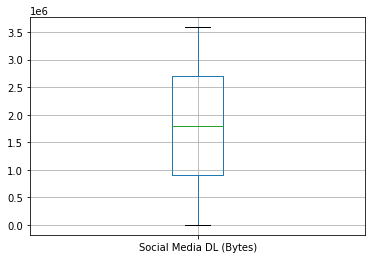

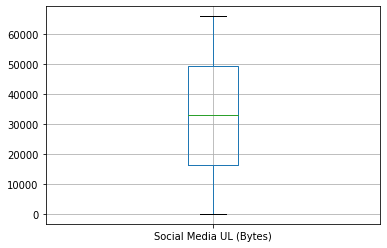

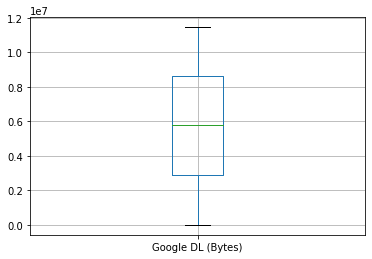

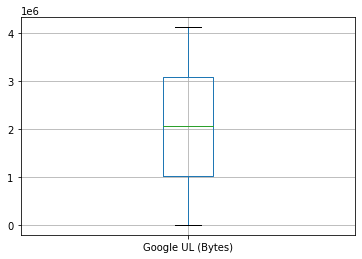

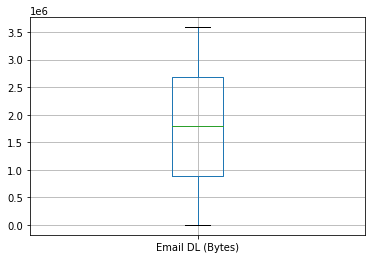

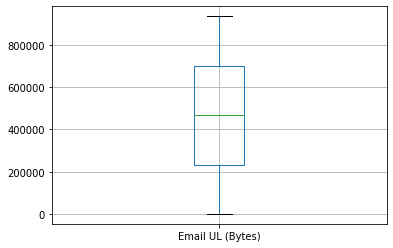

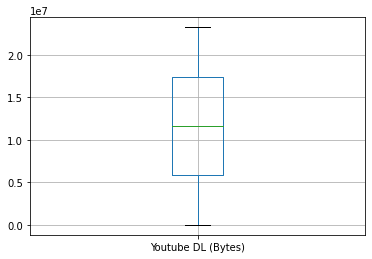

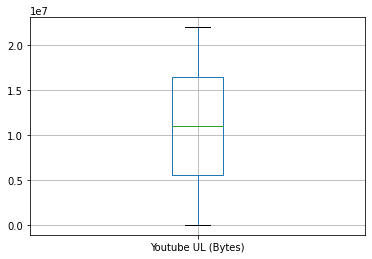

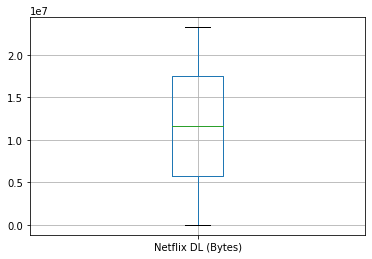

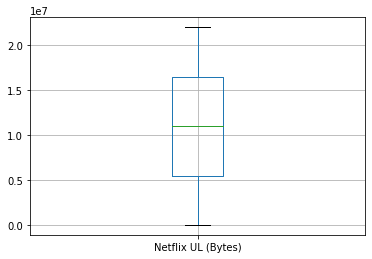

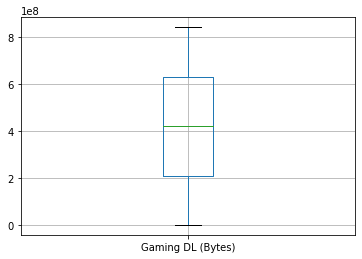

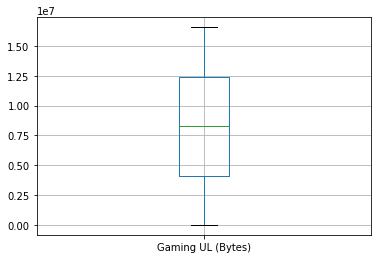

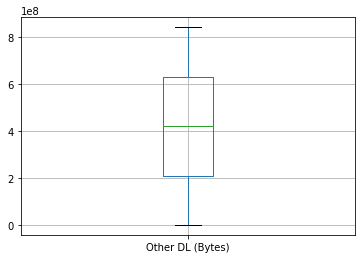

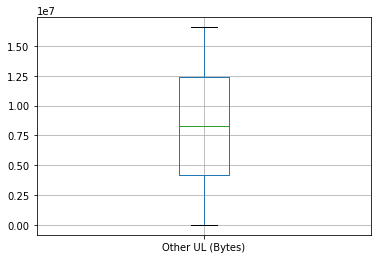

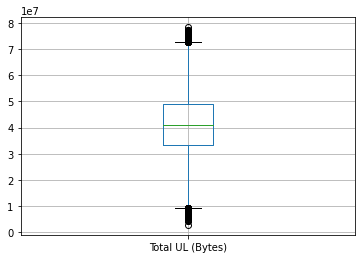

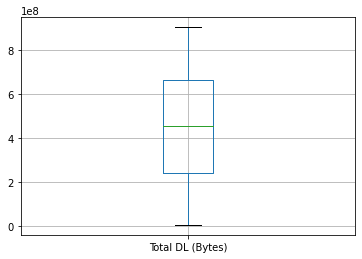

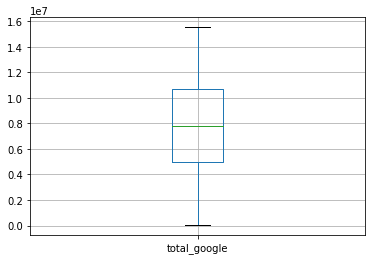

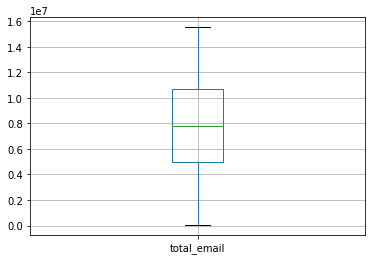

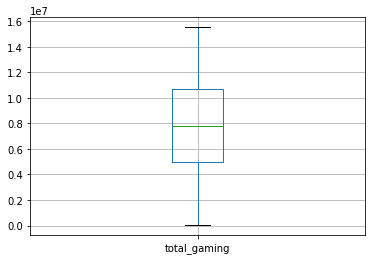

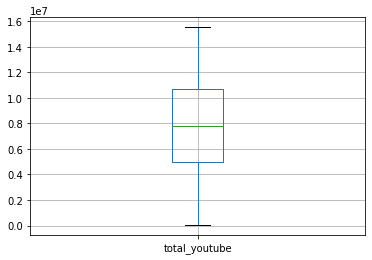

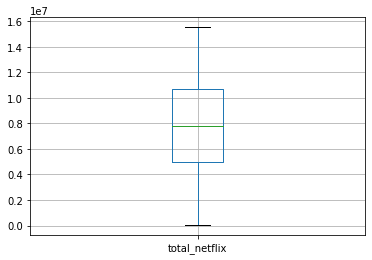

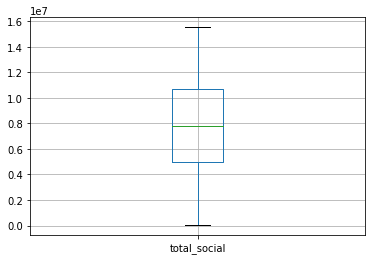

In [11]:
for features in relevant_features:
    plt.figure()
    df.boxplot([features])

* outlier observations

Duration in ms, activity duration ul, activity duration dl, and total ul data features have high degree of outliers and variance

To be filled with the median

#### Univariate Analysis

array([[<AxesSubplot:title={'center':'MSISDN/Number'}>,
        <AxesSubplot:title={'center':'Dur. (ms)'}>,
        <AxesSubplot:title={'center':'Total UL (Bytes)'}>],
       [<AxesSubplot:title={'center':'Total DL (Bytes)'}>,
        <AxesSubplot:title={'center':'total_google'}>,
        <AxesSubplot:title={'center':'total_email'}>],
       [<AxesSubplot:title={'center':'total_gaming'}>,
        <AxesSubplot:title={'center':'total_youtube'}>,
        <AxesSubplot:title={'center':'total_netflix'}>],
       [<AxesSubplot:title={'center':'total_social'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

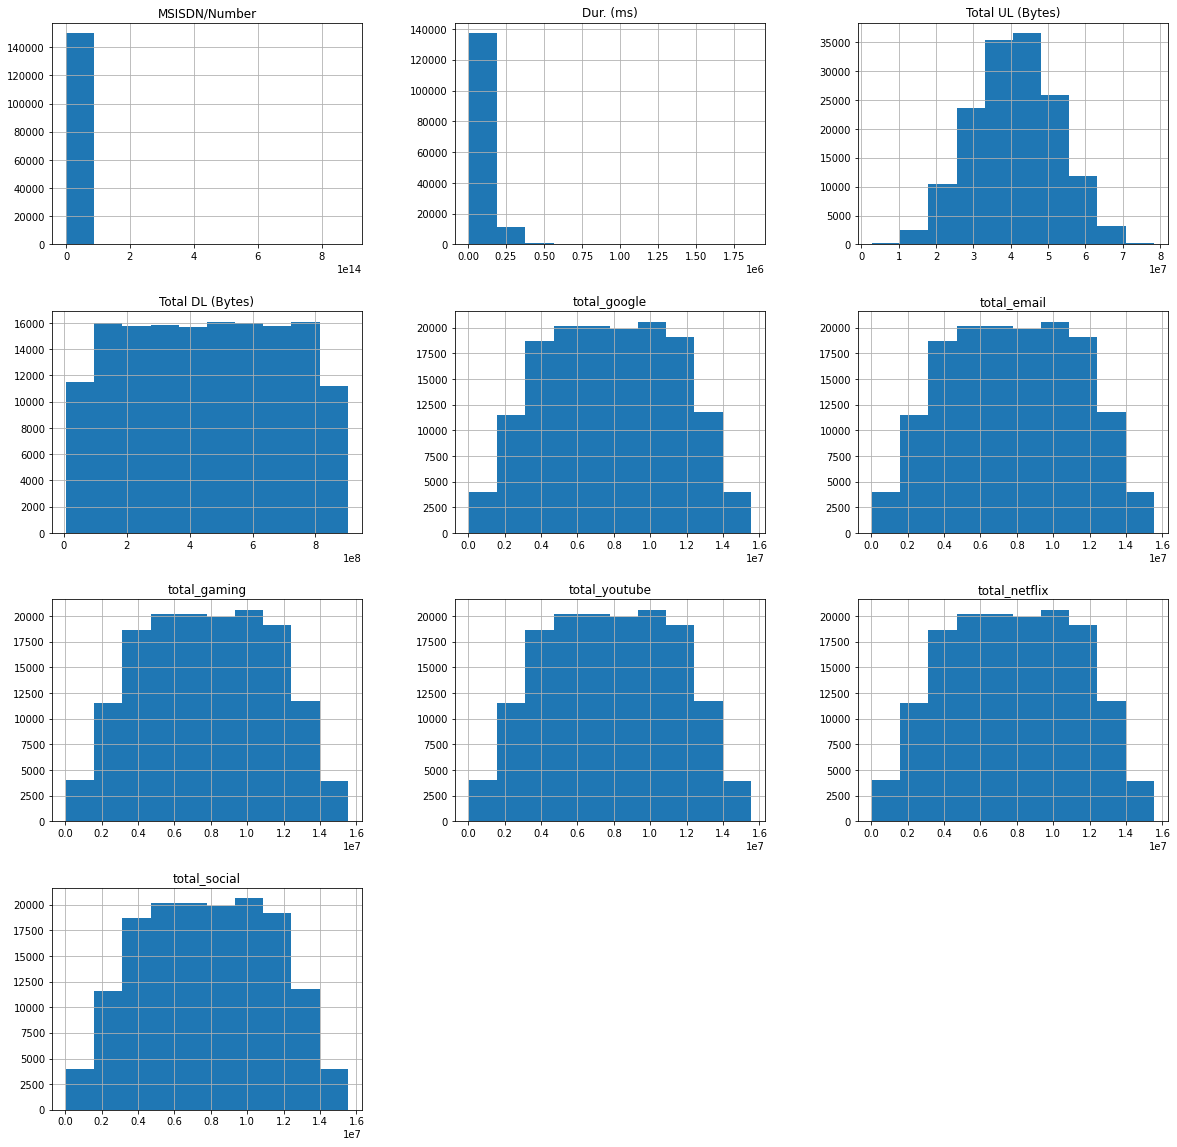

In [12]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df[sub_relevant_features].hist(ax = ax)

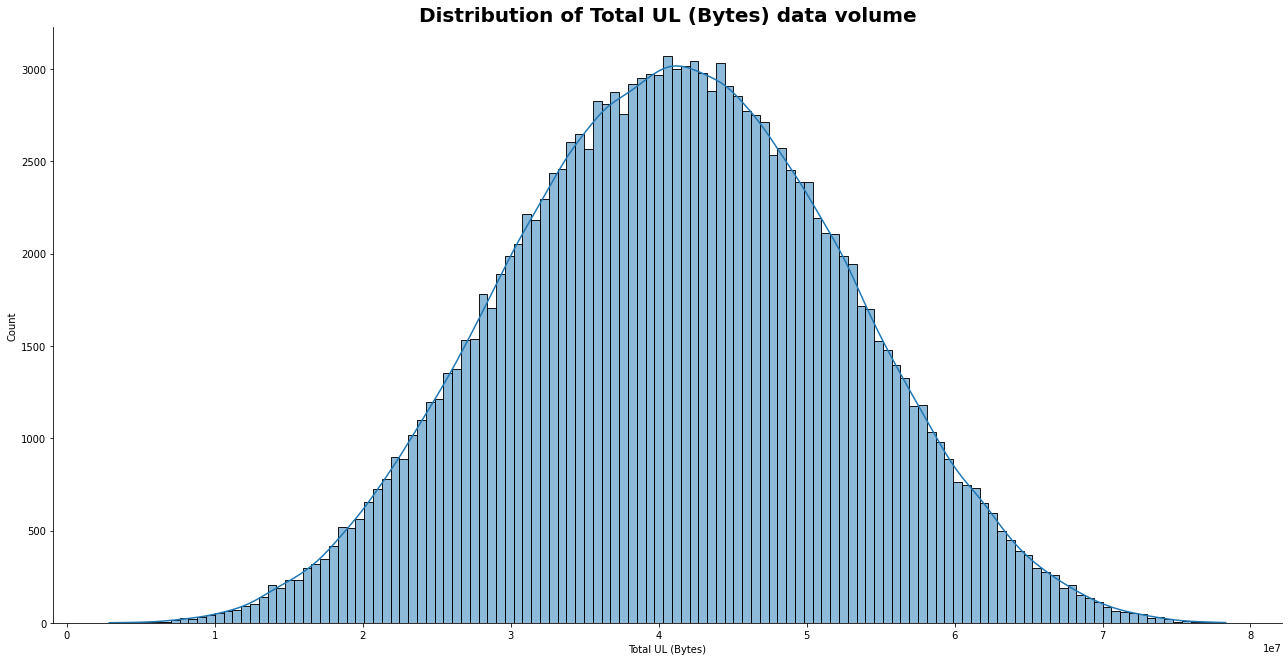

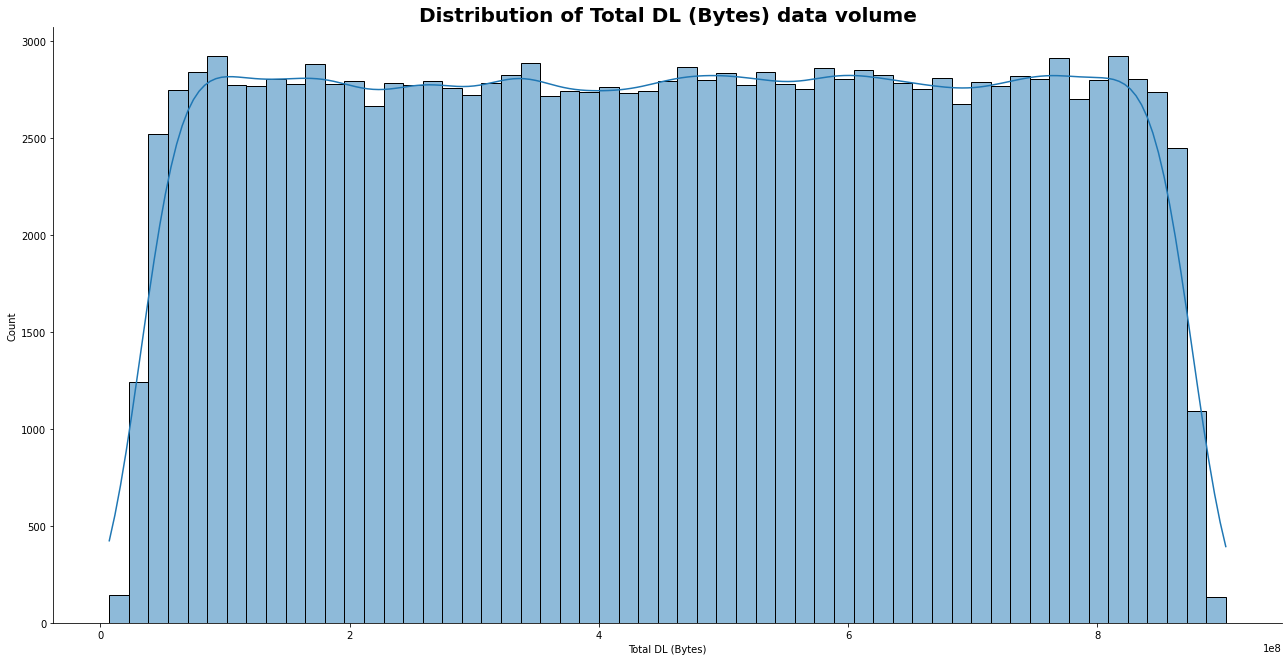

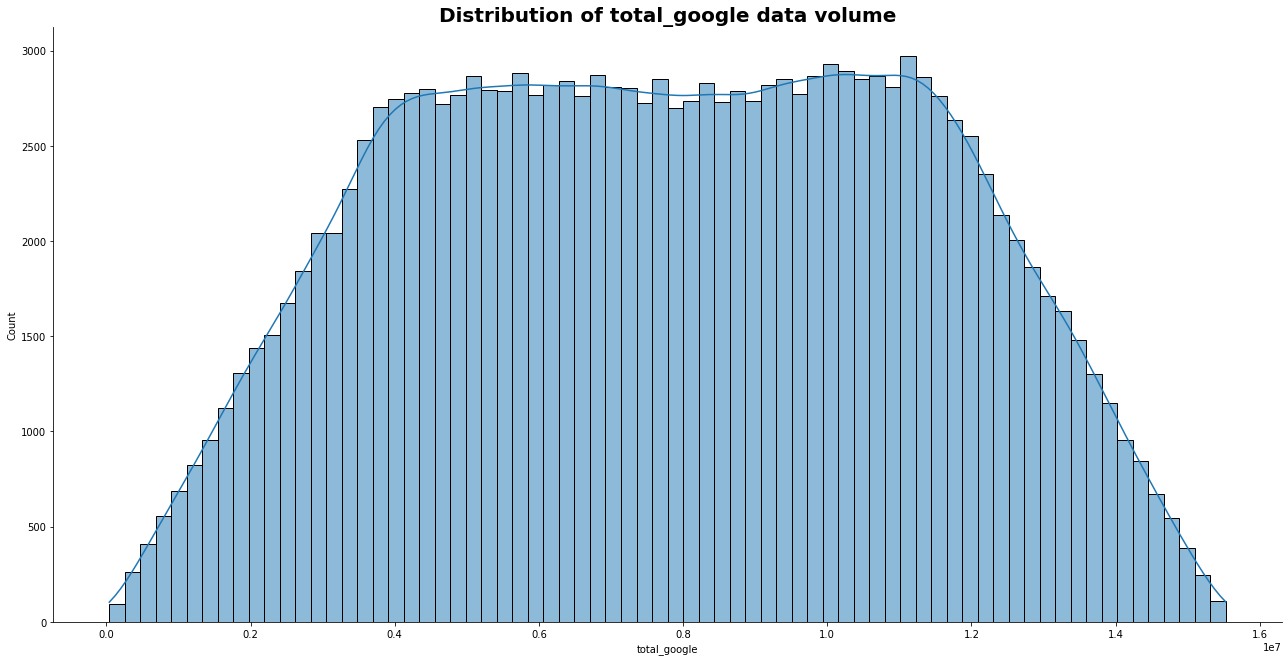

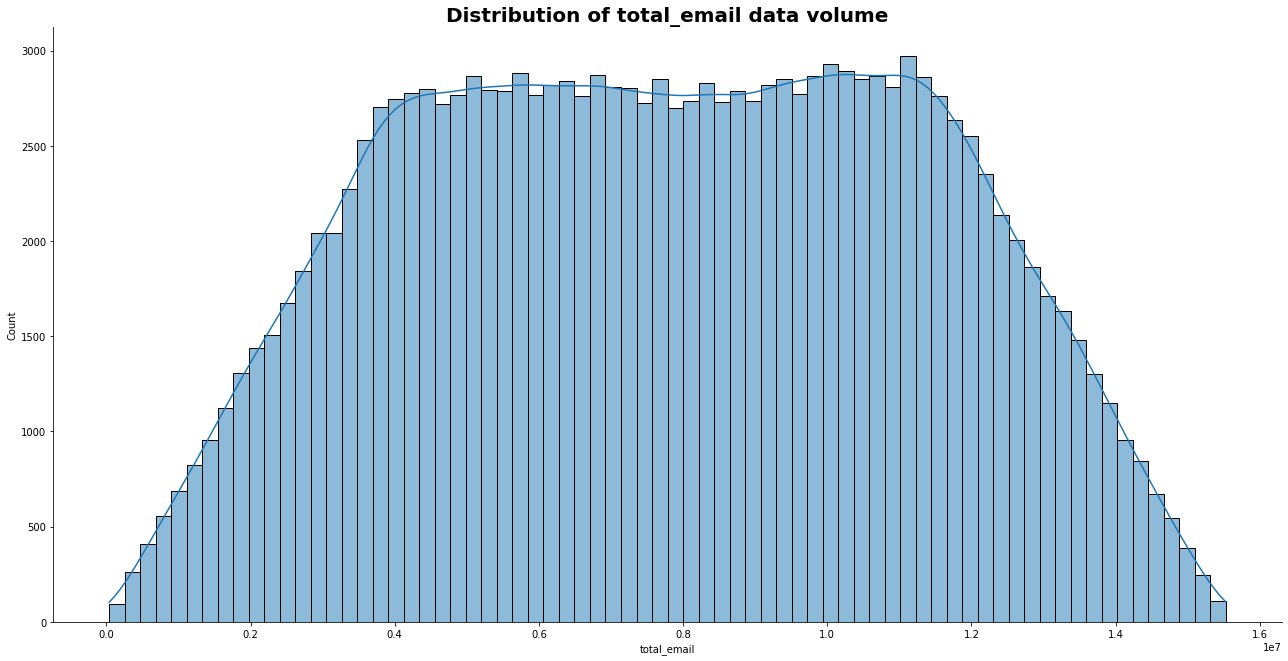

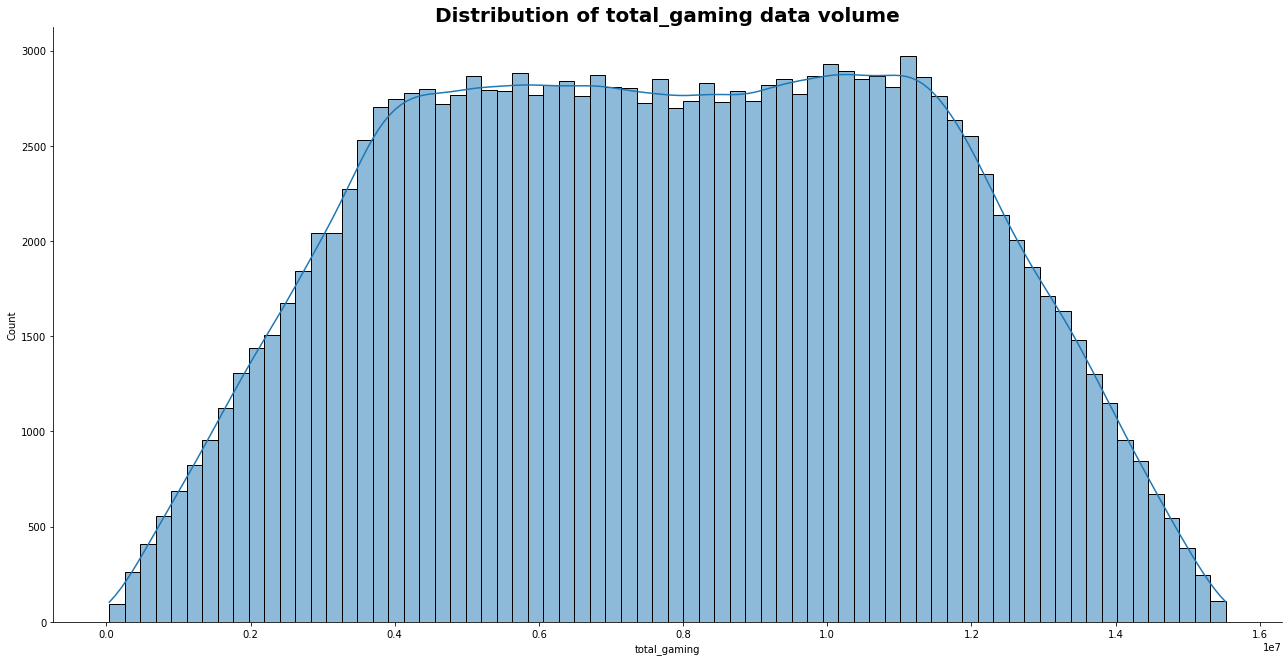

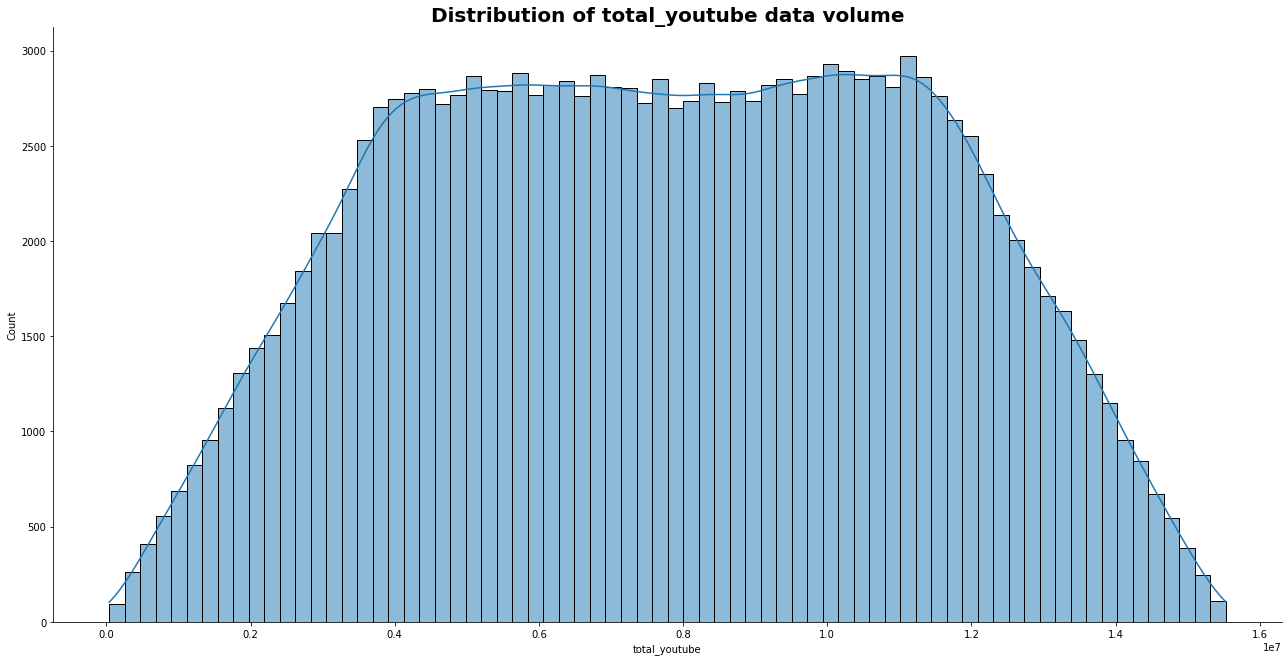

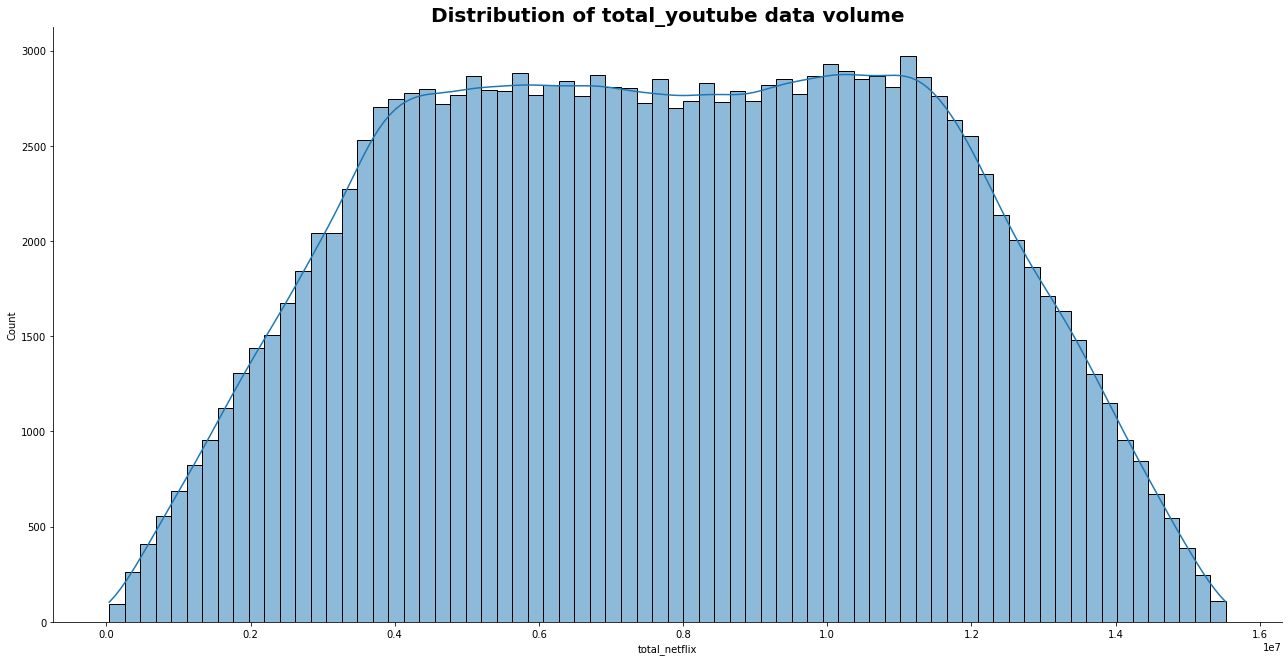

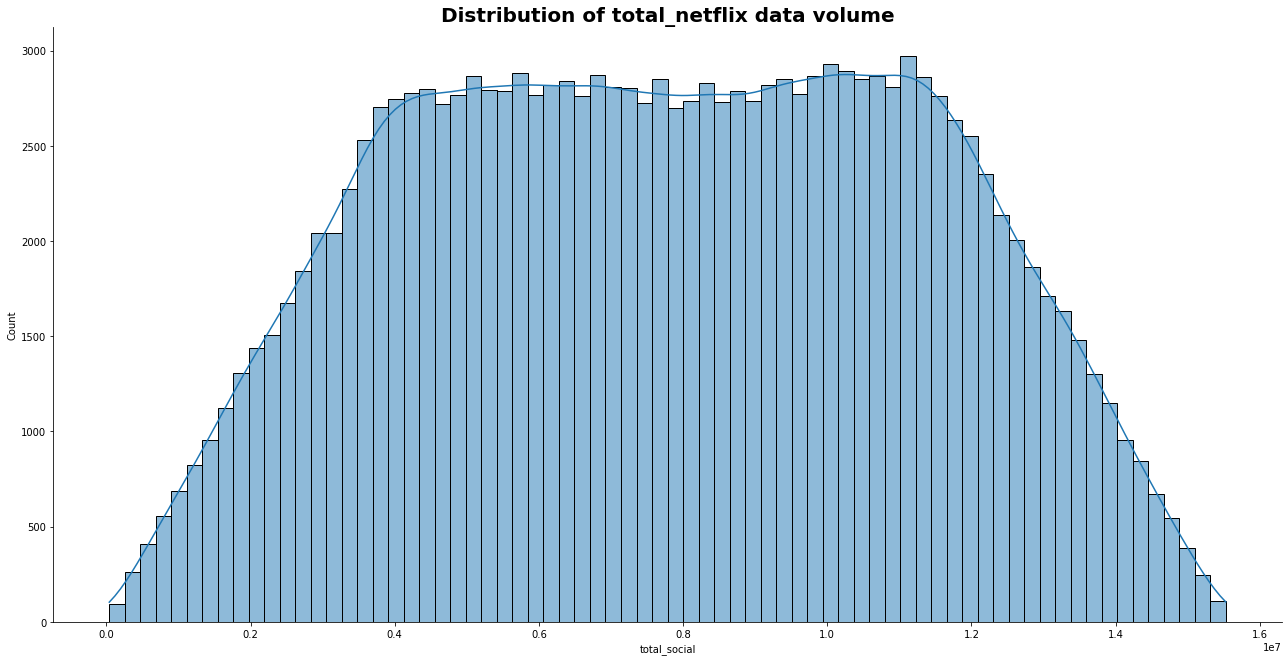

In [13]:
sns.displot(data = df, x = sub_relevant_features[2], kde=True, height=9, aspect=2)
plt.title(f'Distribution of {sub_relevant_features[2]} data volume', size=20, fontweight='bold')
plt.show()

sns.displot(data = df, x = sub_relevant_features[3], kde=True, height=9, aspect=2)
plt.title(f'Distribution of {sub_relevant_features[3]} data volume', size=20, fontweight='bold')
plt.show()

sns.displot(data = df, x = sub_relevant_features[4], kde=True, height=9, aspect=2)
plt.title(f'Distribution of {sub_relevant_features[4]} data volume', size=20, fontweight='bold')
plt.show()

sns.displot(data = df, x = sub_relevant_features[5], kde=True, height=9, aspect=2)
plt.title(f'Distribution of {sub_relevant_features[5]} data volume', size=20, fontweight='bold')
plt.show()

sns.displot(data = df, x = sub_relevant_features[6], kde=True, height=9, aspect=2)
plt.title(f'Distribution of {sub_relevant_features[6]} data volume', size=20, fontweight='bold')
plt.show()

sns.displot(data = df, x = sub_relevant_features[7], kde=True, height=9, aspect=2)
plt.title(f'Distribution of {sub_relevant_features[7]} data volume', size=20, fontweight='bold')
plt.show()

sns.displot(data = df, x = sub_relevant_features[8], kde=True, height=9, aspect=2)
plt.title(f'Distribution of {sub_relevant_features[7]} data volume', size=20, fontweight='bold')
plt.show()

sns.displot(data = df, x = sub_relevant_features[9], kde=True, height=9, aspect=2)
plt.title(f'Distribution of {sub_relevant_features[8]} data volume', size=20, fontweight='bold')
plt.show()

#### Categorical values

In [65]:
def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

In [68]:
categorical_features = ['Last Location Name', 'Handset Manufacturer', 'Handset Type']

ser1 = df.sample(frac=0.3, random_state=777)[categorical_features[1]].value_counts().nlargest(5)
ser2 = df.sample(frac=0.3, random_state=777)[categorical_features[2]].value_counts().nlargest(5)

name1 = ser1.keys()
count1 = ser1.values
name2 = ser2.keys()
count2 = ser2.values


df1 = pd.DataFrame({'Handset Manufacturer': name1, 'count': count1})
df2 = pd.DataFrame({'Handset Type': name2, 'count': count2})
df1

,Handset Manufacturer,count
0,Apple,20880
1,Samsung,12115
2,Huawei,10337
3,Sony Mobile Communications Ab,295
4,Wiko Global Sasu,226


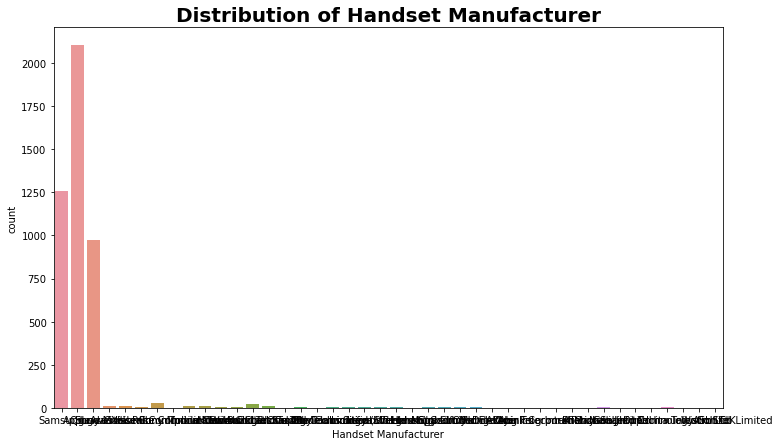

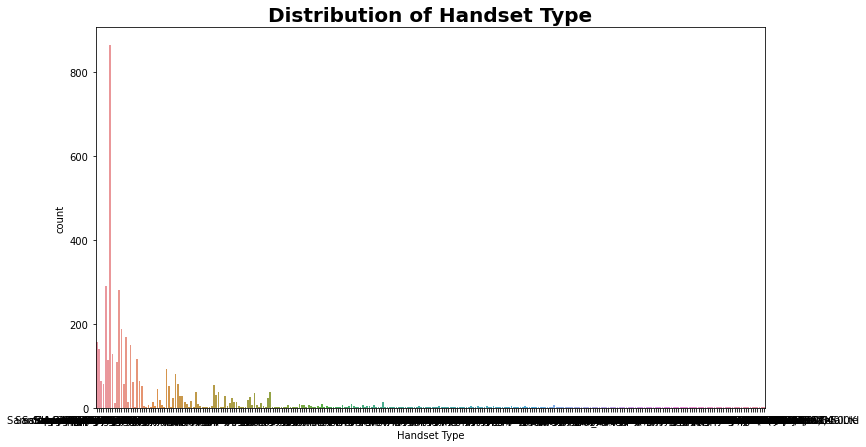

In [79]:
plot_count(df = df.sample(frac=0.03, random_state=777), column= 'Handset Manufacturer')
plot_count(df = df.sample(frac=0.03, random_state=777), column='Handset Type')

* very few of the handset manufacturers and many few of handset types dominate

### Bi-variate Analysis

In [ ]:
# since the data is very large we took 30% to demonstrate
sample_data = df.sample(frac=0.3)
sample_data.shape()

KeyboardInterrupt: 

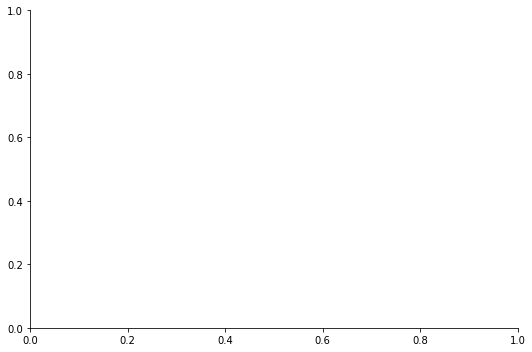

In [ ]:
sns.displot(data=df, x='total_gaming', hue='total_youtube', kind='kde', fill=True, height=5, aspect=1.5)

### Variable transformations

### Correlation Analysis

### Dimensionality Reduction